In [1]:
#importing or including important libraries
import pandas as pd
import numpy as np

In [2]:
#reading the csv file in a data set
ds = pd.read_csv('Salaries.csv')

#storing the data set in a data frame
df = pd.DataFrame(data=ds)

#displaying the data frame
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
#printing the the type of data frame
type(df)

pandas.core.frame.DataFrame

In [4]:
#printing the columns available in data frame
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
#displaying the type of data frame columns
type(df.columns)

pandas.core.indexes.base.Index

In [6]:
#displaying the top 5 rows of data frame
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [7]:
#displaying the bottom 5 rows of data frame
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [8]:
#displaying sample row of the data frame
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
238,Prof,A,46,40,Male,77202


# Null Values

In [9]:
#displaying boolean (T/F) for the values if it is null or not null
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [10]:
#displaying the total number of Null Values available columnwise
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [11]:
#displaying the total number of Null Values available in the entire data frame
df.isnull().sum().sum()

0

In [12]:
#displaying the shape of dataset i.e. rows and columns present in the dataset
df.shape

(397, 6)

In [13]:
#since there is no null values in dataset we leave the process 
#otherwise we use imputation to fill left-out values with fillna method or simpleimputer or any other imputer

In [14]:
#Since Machine understand only numeric values and we have some columns with string values
#Hence we need to transform our columns / features in numeric values

In [15]:
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()
df['rank']=lencode.fit_transform(df['rank'])
df['discipline']=lencode.fit_transform(df['discipline'])
df['sex']=lencode.fit_transform(df['sex'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [16]:
#showing unique values in the encoaded columns
df['sex'].unique()

array([1, 0])

In [17]:
df['rank'].unique()

array([2, 1, 0])

In [18]:
df['discipline'].unique()

array([1, 0])

In [19]:
len(df['discipline'].unique())

2

# EDA

## Scatterplot

In [20]:
df['rank'].unique()

array([2, 1, 0])

In [21]:
#importing seaborn library as sns
import seaborn as sns
import matplotlib.pyplot as plt

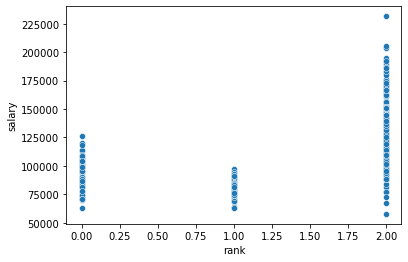

In [22]:
import seaborn as sns
sns.scatterplot(x="rank", y="salary", data=df)
plt.show()

- rank is equally distributed up to 100000

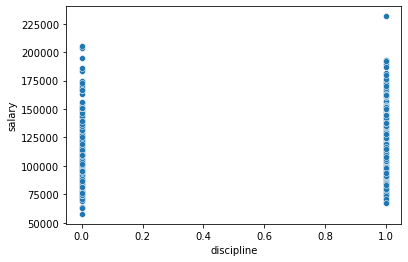

In [23]:
sns.scatterplot(x="discipline", y="salary", data=df)
plt.show()

- discipline is equally distributed up to salary of 200000

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

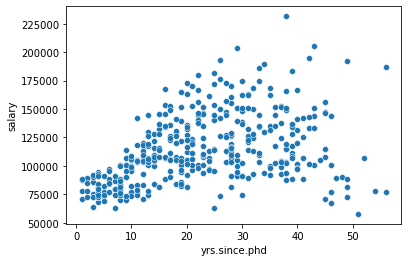

In [24]:
sns.scatterplot(x="yrs.since.phd", y="salary", data=df)

- years since phd is ccattered

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

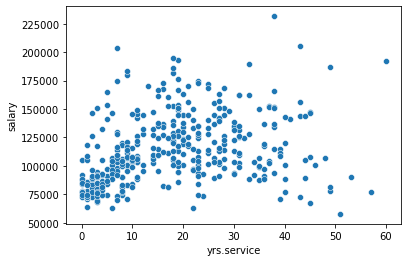

In [25]:
sns.scatterplot(x="yrs.service", y="salary", data=df)

- years of service is ccattered

<AxesSubplot:xlabel='sex', ylabel='salary'>

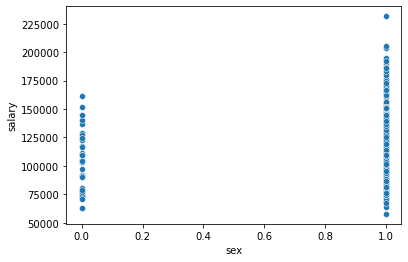

In [26]:
sns.scatterplot(x="sex", y="salary", data=df)

- Sex is not equally distributed with respect to salary

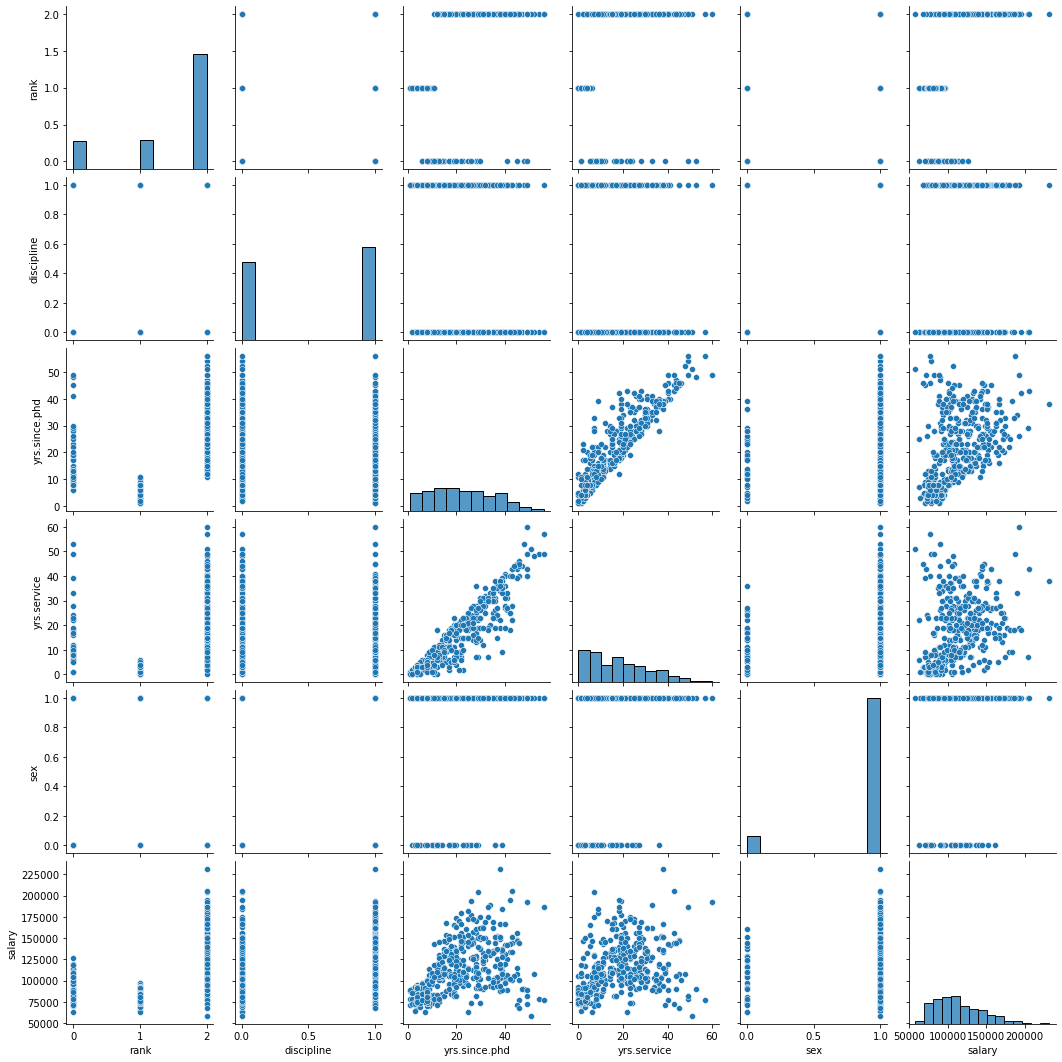

In [27]:
#showing data of all the columns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('mypair.png')
plt.show()

In [28]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


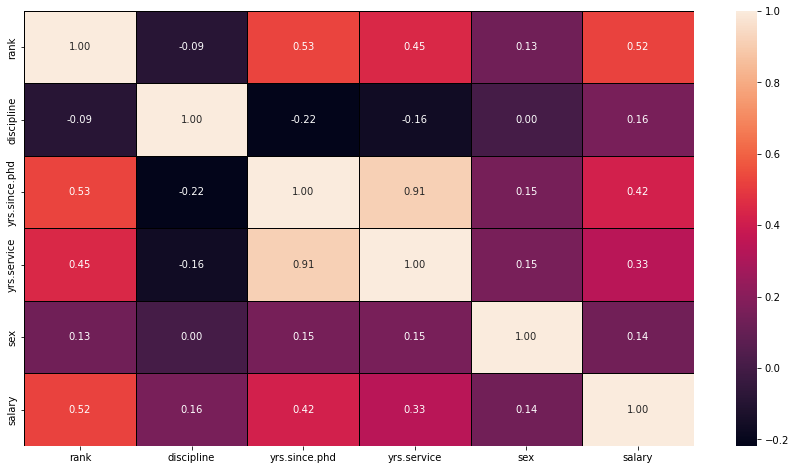

In [29]:
#size of the figure
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')
plt.show()

- 1. rank, yrs.since.phd and yrs.service are substantially correlated to salary
- 2. other features are bit correlated to salary

In [30]:
#showing the correlation of Happiness Score with other columns in sorted order
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

# Descriptive Statistics

In [31]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


- Features are not normally distributed

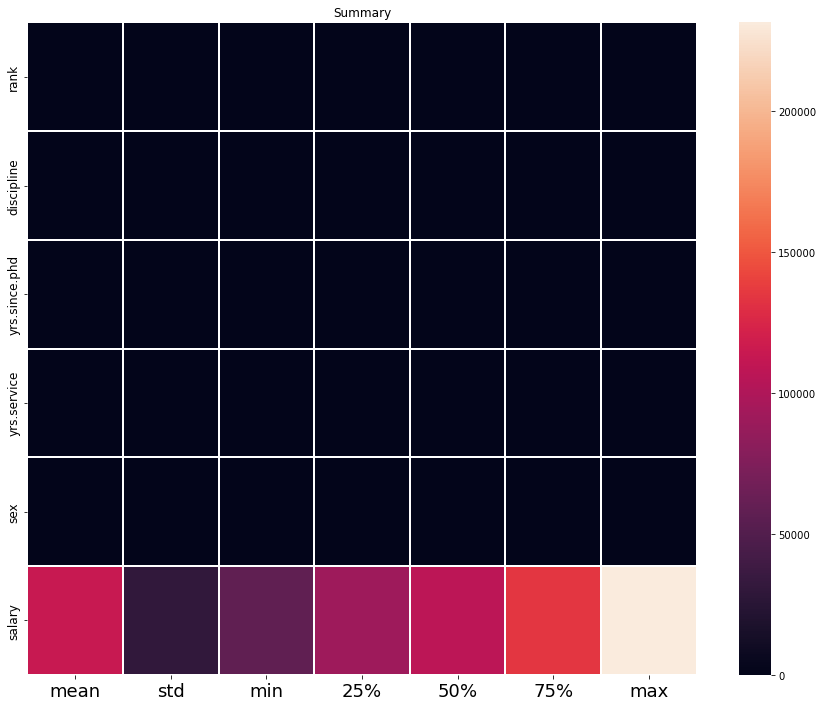

In [32]:
#showing describe elements using heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=False,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Summary")
plt.savefig('heatmap.png')
plt.show()

- Outcome
- Data frame has 397 Rows and 6 Columns
-yrs.since.phd 
- - Min = 1
- - 25% = 12
- - 50% = 21
- - 75% = 32
- - Max = 56

and so on for other features.

In [33]:
#showing columns data type and memory used by data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


# Outliers Checking 

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
#Declaring variables 
collist=df.columns.values
ncol=25
nrow=15

In [36]:
collist

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

In [37]:
for i in range(0,len(collist)):
    print(collist[i])
    

rank
discipline
yrs.since.phd
yrs.service
sex
salary


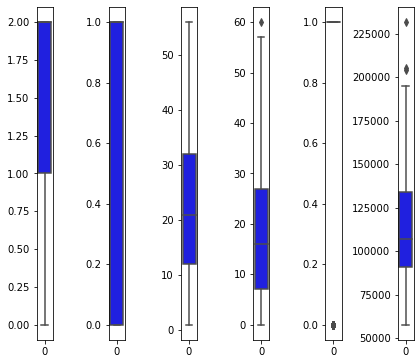

In [38]:
#showing boxplot of features
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

- yrs.service and salary features seems to have some outlier

# Skewness

In [39]:
#displaying skeness in the features of data frame
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

- Threshhold for skeness is +-0.7
- Sex and yrs.service have higher skewness but both of these features are transformed features so no need to do anything

# Normal Distribution Curve

<AxesSubplot:xlabel='rank', ylabel='Density'>

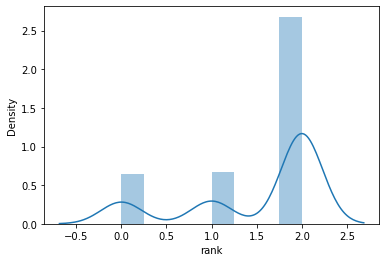

In [40]:
sns.distplot(df['rank'])

<AxesSubplot:xlabel='discipline', ylabel='Density'>

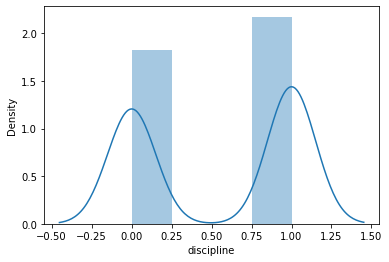

In [41]:
sns.distplot(df['discipline'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

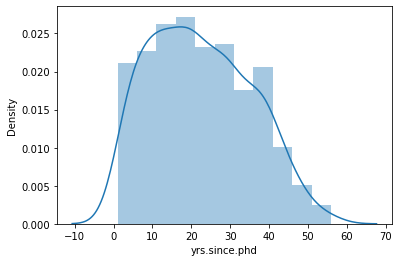

In [42]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

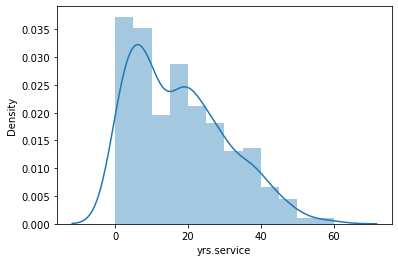

In [43]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

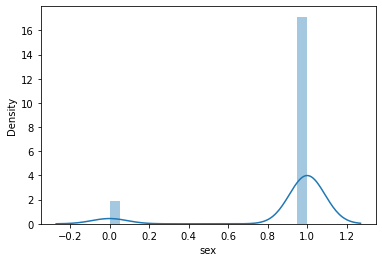

In [44]:
sns.distplot(df['sex'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

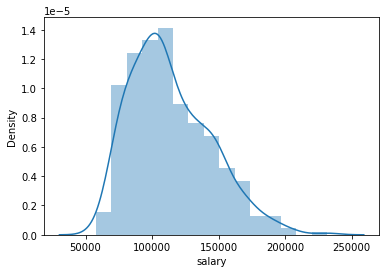

In [45]:
sns.distplot(df['salary'])

- Economy (GDP per Capita), Family features are not normally distributed

# The normal Distribution shows that the data is skewed

## Cleansing the data

In [46]:
df.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

- Threshhold correlation with salary Score is +-0.1 for removing feature
- Since no feature is less correlated than 0.1 with salary hence no removal of feature

## Removing outliers

In [47]:
#showing zscore of dataframe
from scipy.stats import zscore
np.abs(zscore(df))

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.649257,0.915403,0.257550,0.029669,0.330058,0.860919
1,0.649257,0.915403,0.179854,0.124300,0.330058,1.966672
2,0.672564,0.915403,1.422982,1.125098,0.330058,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.330058,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.330058,0.918768
...,...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.330058,0.350418
393,0.649257,1.092415,0.674796,0.106654,0.330058,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.330058,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.330058,0.607502


In [48]:
#showing shape of dataframe
z=np.abs(zscore(df))
z.shape

(397, 6)

In [49]:
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [50]:
type(z)

pandas.core.frame.DataFrame

In [51]:
#43 rows have outliers
len(np.where(z>3)[0])

43

In [52]:
df_new=df[(z<3).all(axis=1)]

In [53]:
print("Old Data Frame",df.shape)
print("New Data Frame",df_new.shape)
print("Total Data Loss",df.shape[0]-df_new.shape[0])

Old Data Frame (397, 6)
New Data Frame (354, 6)
Total Data Loss 43


## Percentage Data Loss

In [54]:
dl=(397-354)/397
print("Data Loss is ",round(dl*100,0)," %")

Data Loss is  11.0  %


- Data Loss upto 8% acceptable here it is only 11 % hence we will loose substantial data so we will use original dataframe

In [55]:
#df.drop(['sex','discipline','rank'],axis=1,inplace=True)

In [56]:
#Dividing Data into features x and target y
y=pd.DataFrame(data=df.iloc[:,-1])
x=df.iloc[:,0:-1]

In [57]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [58]:
y

,salary
0,139750
1,173200
2,79750
3,115000
4,141500
...,...
392,103106
393,150564
394,101738
395,95329


# Transforming data to remove skewness

In [59]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [60]:
type(x)

numpy.ndarray

In [61]:
#x is 2 dimention array
x.ndim

2

In [62]:
xd=pd.DataFrame(data=x)
xd.skew()

0   -0.830409
1   -0.177684
2   -0.132757
3   -0.122152
4   -2.709958
dtype: float64

In [63]:
#showing skeyness is near to zero
x.mean()

1.718188983198227e-16

In [64]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error  #error checking system
from sklearn.model_selection import train_test_split

In [65]:
#Showing best value of random state
from sklearn.metrics import r2_score
lm=LinearRegression()
rstate=0
rscore=0

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    if(round(r2_score(y_test,pred)*100)>rscore):
        rstate=i
        rscore=round(r2_score(y_test,pred)*100)

print('best random state is',rstate," ",rscore)

best random state is 800   53


In [66]:
#splitting the data in train and test variables
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=800)

In [67]:
x_train.shape

(265, 5)

In [68]:
y_train.shape

(265, 1)

In [69]:
x_test.shape

(132, 5)

In [70]:
y_test.shape

(132, 1)

In [71]:
#instanciating LinearRegression 
lm=LinearRegression()
#Training the Machine
lm.fit(x_train,y_train)

LinearRegression()

In [72]:
lm.coef_

array([[12247.08332777,  6599.02599275, 11803.23952068, -4863.40907007,
         1316.18227783]])

In [73]:
lm.intercept_

array([113127.36001133])

In [74]:
#showing the accuracy
lm.score(x_train,y_train)

0.3573203895749777

In [75]:
pred=lm.predict(x_test)

In [76]:
#printing predicted values
pred

array([[ 82297.76491031],
       [121108.84844171],
       [101166.46844681],
       [119385.87567771],
       [131465.26172461],
       [ 94071.85964324],
       [ 79590.23009622],
       [118670.87757183],
       [121845.00959246],
       [ 76538.57336816],
       [124165.35882264],
       [ 86450.80961081],
       [123776.53334203],
       [121612.51519922],
       [117411.97879127],
       [ 92473.11174298],
       [ 89863.97511224],
       [130362.87900538],
       [125168.51509086],
       [127380.02224395],
       [139889.12619651],
       [130276.41926415],
       [ 92481.2808938 ],
       [130331.81422137],
       [ 77283.3298881 ],
       [122684.73228801],
       [111855.40771245],
       [ 96133.86459908],
       [128415.58002206],
       [124053.40293298],
       [131104.8197403 ],
       [133409.65570627],
       [116818.60312234],
       [111369.78096651],
       [ 93281.54823777],
       [ 82644.65228561],
       [ 82096.13649262],
       [ 93281.54823777],
       [ 850

In [77]:
#Printing Error value
print("Error :")

print("Mean Absolute Error = ",mean_absolute_error(y_test,pred))
print("mean squared error = ",mean_squared_error(y_test,pred))

print("root mean squared error = ",np.sqrt(mean_squared_error(y_test,pred)))

Error :
Mean Absolute Error =  15737.574172156983
mean squared error =  393012341.272799
root mean squared error =  19824.538866586507


In [78]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred)*100," %")          

53.052024682771574  %


In [79]:
lm.predict([[2,1,22,20,1]])

array([[307939.82299099]])

In [80]:
#saving the model
import pickle
outfile=open('mylr.obj','wb')
pickle.dump(lm,outfile)
outfile.close()

In [81]:
#loading the model
infile=open('mylr.obj','rb')
new_lm=pickle.load(infile)
infile.close()

In [82]:
#using the model
new_lm.predict([[2,1,22,20,1]])

array([[307939.82299099]])